# Operations on Erdőss-Renyi Graphs

Simulate Erdős-Rényi graphs. Please implement a code which creates random networks.

Measure the percolation threshold for system sizes 𝑁=10,100,1000

Measure both the size of the infinite component 𝑃∞
 and the average size of the components without the giant component 𝑆

Measure 𝑆(⟨𝑘⟩)
 for different ⟨𝑘⟩
 bearing in mind that the critical average degree is ⟨𝑘⟩=1
. Find the maximum as function of 𝑁
. For this exercise you may use high level connected component finder functions.

Measure the clustering coefficient for the following parameters  𝑁=10,100,1000
, ⟨𝑘⟩=0.5,1,2,4
 (in total 12 value pairs). Do not use high level functions, implement the definition.

Measure the assortativity for 𝑁=10,100,1000
, ⟨𝑘⟩=5
, and plot the average degree of the neighbors as function of the node degree.
Do not forget to use ensemble average, namely, use at least 10 different random realizations!

**Import Libraries**


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Generation of Erdöss-Rényi Graphs**

In [ ]:
def generate_erdos_renyi_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
    return G


**Measure Components**

In [ ]:
def measure_components(G):
    components = list(nx.connected_components(G))
    sizes = sorted([len(c) for c in components], reverse=True)
    P_infinity = sizes[0]
    S = np.mean(sizes[1:]) if len(sizes) > 1 else 0
    return P_infinity, S




**Clustering Coefficients**

In [ ]:
def clustering_coefficient(G):
    c = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        k = len(neighbors)
        if k < 2:
            c[node] = 0.0
        else:
            links = 0
            for i in range(k):
                for j in range(i + 1, k):
                    if G.has_edge(neighbors[i], neighbors[j]):
                        links += 1
            c[node] = 2 * links / (k * (k - 1))
    return np.mean(list(c.values()))



**Plot Assortativity**

In [ ]:
def plot_degree_correlation(G):
    degrees = np.array([G.degree(n) for n in G.nodes()])
    neighbor_avg_degree = np.array([np.mean([G.degree(neighbor) for neighbor in G.neighbors(n)]) for n in G.nodes()])

    plt.scatter(degrees, neighbor_avg_degree, alpha=0.5)
    plt.xlabel('Node Degree')
    plt.ylabel('Average Neighbor Degree')
    plt.title('Degree Correlation')
    plt.show()

    return nx.degree_assortativity_coefficient(G)




**Simulation**

In [ ]:

sizes = [10, 100, 1000]
probabilities = [0.5, 1, 2, 4]  # k values to convert to probability p

for N in sizes:
    for k in probabilities:
        p = k / (N - 1)
        P_inf_values = []
        S_values = []
        clustering_values = []
        assortativity_values = []

        for _ in range(10):  # ensembled average over 10 realizations
            G = generate_erdos_renyi_graph(N, p)
            P_inf, S = measure_components(G)
            P_inf_values.append(P_inf)
            S_values.append(S)
            clustering_values.append(clustering_coefficient(G))

        print(f'N={N}, k={k}, <P_inf>={np.mean(P_inf_values)}, <S>={np.mean(S_values)}, <Clustering>={np.mean(clustering_values)}')
        if k == 5:
            print(f'N={N}, k={5}, <Assortativity>={np.mean(assortativity_values)}')


N=10, k=0.5, <P_inf>=2.9, <S>=1.09, <Clustering>=0.0
N=10, k=1, <P_inf>=4.4, <S>=1.3583333333333334, <Clustering>=0.05333333333333333
N=10, k=2, <P_inf>=8.8, <S>=0.55, <Clustering>=0.118
N=10, k=4, <P_inf>=9.9, <S>=0.1, <Clustering>=0.42978571428571427
N=100, k=0.5, <P_inf>=5.8, <S>=1.3192479538130732, <Clustering>=0.0
N=100, k=1, <P_inf>=26.8, <S>=1.5478458359989535, <Clustering>=0.0016666666666666666
N=100, k=2, <P_inf>=77.1, <S>=1.3666889483065954, <Clustering>=0.009661904761904762
N=100, k=4, <P_inf>=97.6, <S>=1.0333333333333332, <Clustering>=0.03464076479076479
N=1000, k=0.5, <P_inf>=10.1, <S>=1.319124582693964, <Clustering>=0.0006000000000000001
N=1000, k=1, <P_inf>=106.2, <S>=1.7875789402461943, <Clustering>=0.00014
N=1000, k=2, <P_inf>=810.6, <S>=1.2564400974991705, <Clustering>=0.001178095238095238
N=1000, k=4, <P_inf>=980.3, <S>=1.0512390844051658, <Clustering>=0.003644487734487734


**Plot  for k=5 (not ensembled)**

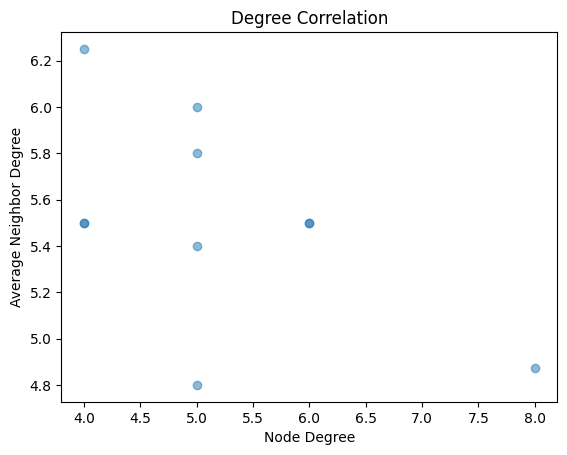

N=10, k=5, P_inf=10, S=0, Clustering=0.5930952380952381
N=10, k=5, Assortativity=-0.2010869565217413


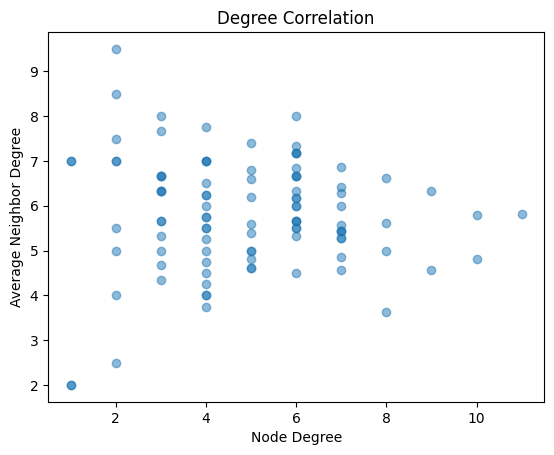

N=100, k=5, P_inf=100, S=0, Clustering=0.05677633477633478
N=100, k=5, Assortativity=-0.053944435552815556


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


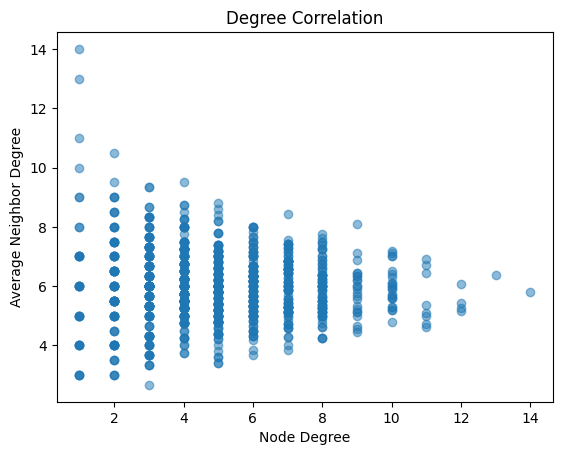

N=1000, k=5, P_inf=988, S=1.0, Clustering=0.003865850815850816
N=1000, k=5, Assortativity=-0.02822625944823176


In [ ]:
sizes = [10, 100, 1000]
probabilities = [5]  # k values to convert to probability p

for N in sizes:
    for k in probabilities:
        p = k / (N - 1)
        G = generate_erdos_renyi_graph(N, p)
        assortativity = plot_degree_correlation(G)
        P_inf, S = measure_components(G)
        clustering = clustering_coefficient(G)

        print(f'N={N}, k={k}, P_inf={P_inf}, S={S}, Clustering={clustering}')
        print(f'N={N}, k={k}, Assortativity={assortativity}')